# TP1 Ensembles
## Made by **Abdennour Kerboua** (alone)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

# Datasets


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


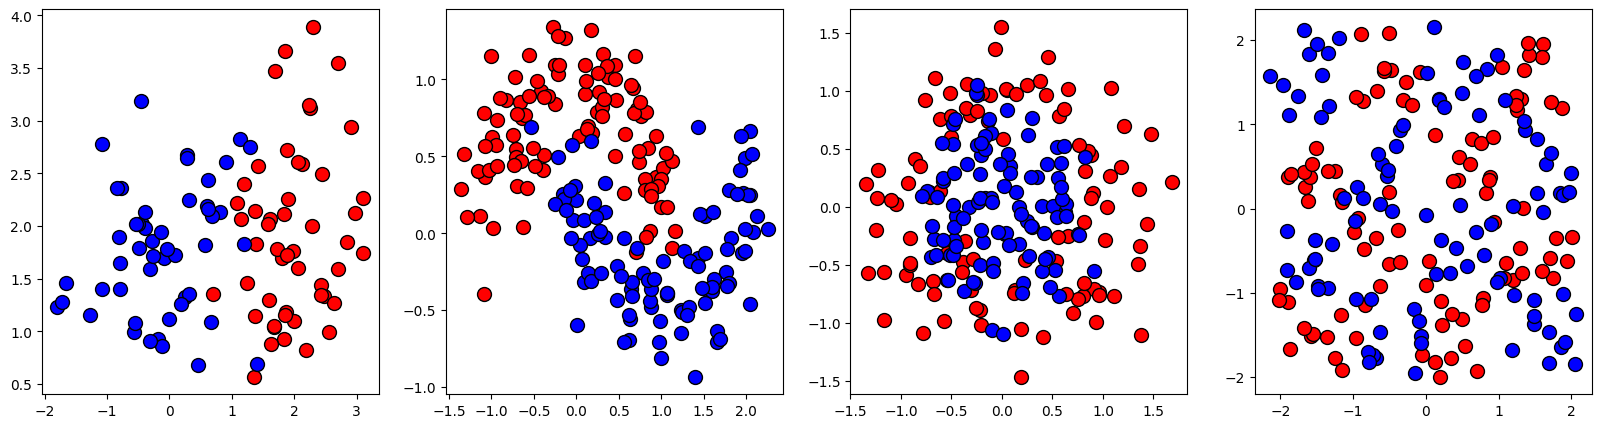

In [2]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [3]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

### Exercise 1

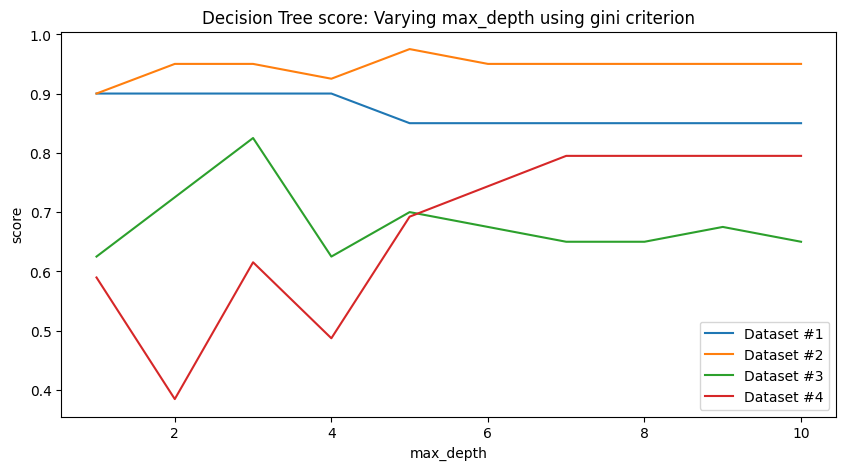

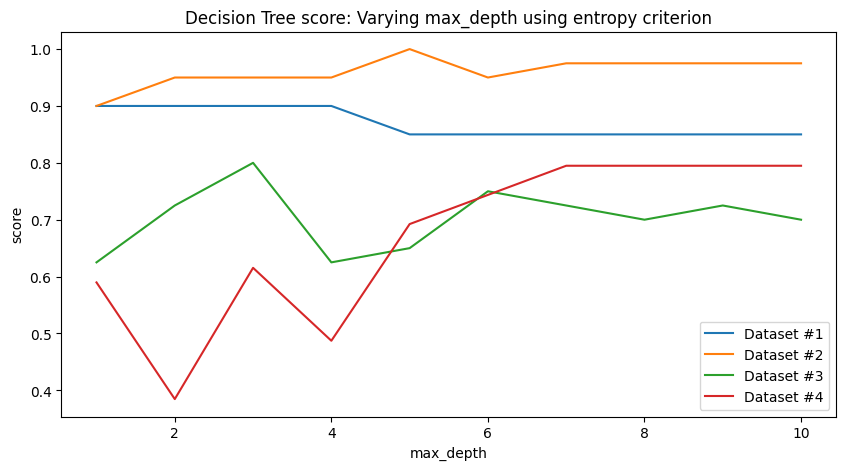

In [16]:
criterions = ["gini", "entropy"]
"""
for i in range(len(datasets)):
    print("Dataset #: ", i)
    X = datasets[i][0]
    y = datasets[i][1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    for crit in criterion:
        print("Criterion: ", crit)
        tree = DecisionTreeClassifier(criterion=crit,max_depth=5,random_state=0)
        tree.fit(X_train, y_train)
        plot_tree(tree,X,y)
"""

dataset_train = []
dataset_test = []
for i in range(len(datasets)):
    X = datasets[i][0]
    y = datasets[i][1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    dataset_train.append((X_train,y_train))
    dataset_test.append((X_test,y_test))

results = np.zeros((len(datasets),len(criterions),10))
trees_best = [[None]*len(datasets)]*len(criterions)
mp_range = np.arange(1, 11)
for k in range(len(criterions)):
    crit = criterions[k]
    plt.figure(figsize=(10,5))
    plt.title("Decision Tree score: Varying max_depth using "+crit+" criterion")

    for j in range(len(datasets)):
        scores = []
        score_max = -np.inf
        for i in mp_range:
            X = datasets[j][0]
            y = datasets[j][1]
            X_train, y_train = dataset_train[j]
            X_test, y_test = dataset_test[j]
            tree = DecisionTreeClassifier(criterion=crit,max_depth=i,random_state=0)
            tree.fit(X_train, y_train)
            score_cand = tree.score(X_test, y_test)
            if score_cand > score_max:
                score_max = score_cand
                trees_best[k][j] = tree
            scores.append(score_cand)
        plt.plot(mp_range, scores, label="Dataset #"+str(j+1))
        results[j,k] = scores
    plt.xlabel("max_depth")
    plt.ylabel("score")
    plt.legend()

### Exercise 2

Dataset # 1
Criterion:  gini
Max depth:  1
Score:  0.9


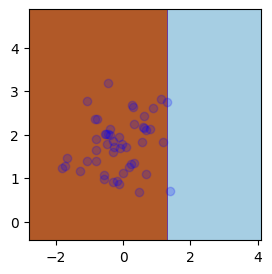


Criterion:  entropy
Max depth:  1
Score:  0.9


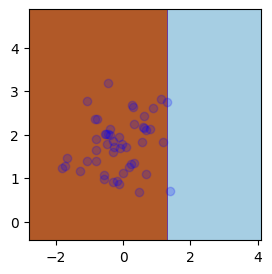


Dataset # 2
Criterion:  gini
Max depth:  5
Score:  0.975


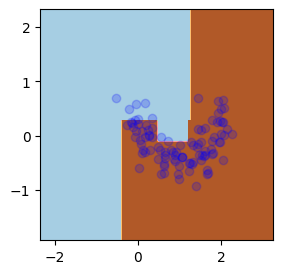


Criterion:  entropy
Max depth:  5
Score:  1.0


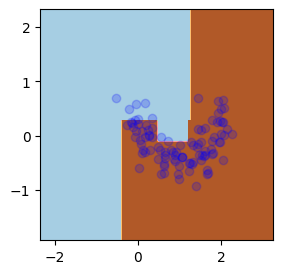


Dataset # 3
Criterion:  gini
Max depth:  3
Score:  0.825


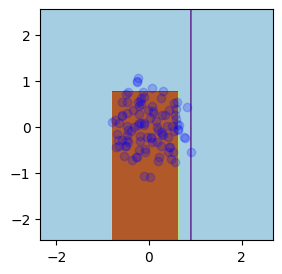


Criterion:  entropy
Max depth:  3
Score:  0.8


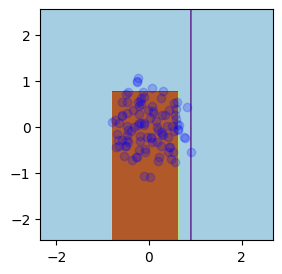


Dataset # 4
Criterion:  gini
Max depth:  7
Score:  0.7948717948717948


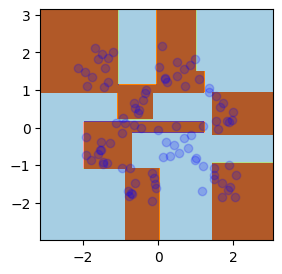


Criterion:  entropy
Max depth:  7
Score:  0.7948717948717948


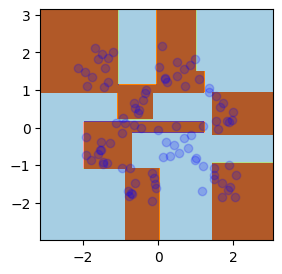

In [19]:
for i in range(len(datasets)):
    print("Dataset #", i+1)
    X,y = datasets[i]
    for j in range(len(criterions)):
        print("Criterion: ", criterions[j])
        print("Max depth: ", np.argmax(results[i,j])+1)
        print("Score: ", np.max(results[i,j]))
        plot_tree(trees_best[j][i],X,y)
        print()

### Exercise 3

Best criterion: entropy, Accuracy:  1.0


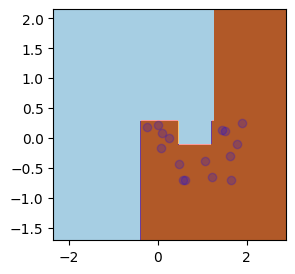

In [25]:
best_score_gini = np.max(results[1,0])
best_score_entropy = np.max(results[1,1])
X_train, y_train = dataset_train[1]
X_test, y_test = dataset_test[1]

if best_score_gini > best_score_entropy:
    print("Best criterion: gini, Accuracy: ", best_score_gini)
    plot_tree(trees_best[0][1],X_test,y_test)
else:
    print("Best criterion: entropy, Accuracy: ", best_score_entropy)
    plot_tree(trees_best[1][1],X_test,y_test)


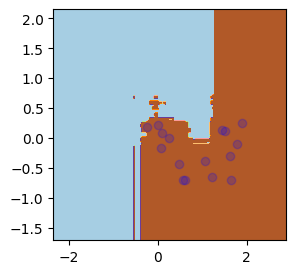

Random Forest Accuracy:  1.0


In [29]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, y_train)
plot_tree(rf,X_test,y_test)
print("Random Forest Accuracy: ", rf.score(X_test, y_test))

The Decision Tree Classifier decision boundary is clearly smoother and more uniform than Random Forest Classifier's and both have the same accuracy. Random forest classifier present an additional decision area outside the main one due to an outlier in train data unuseful for test data.

# Ensembles
## Exercise 4, random forest

In [30]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
rf_diabetes = RandomForestRegressor(random_state=0)
scores_diabetes = cross_val_score(rf_diabetes, X_diabetes, y_diabetes,scoring='r2',cv=5)


# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
rf_iris = RandomForestClassifier(random_state=0)
scores_iris = cross_val_score(rf_iris, X_iris, y_iris,scoring='accuracy',cv=5)


# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
rf_digits = RandomForestClassifier(random_state=0)
scores_digits = cross_val_score(rf_digits, X_digits, y_digits,scoring='accuracy',cv=5)



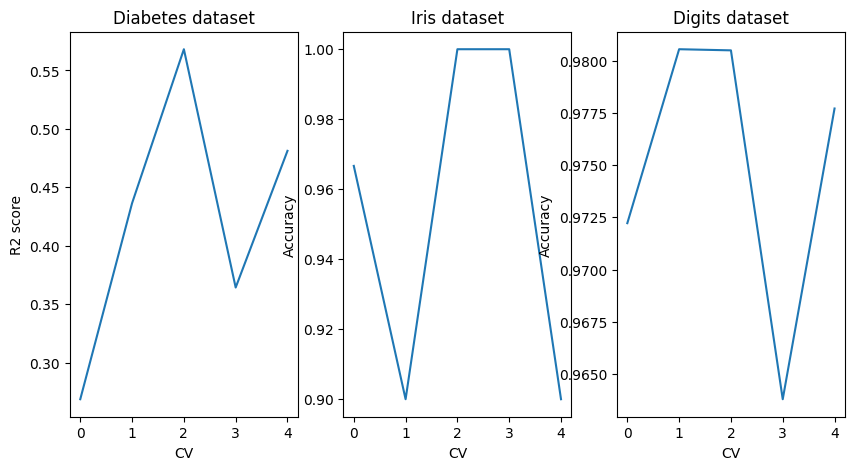

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Diabetes dataset")
plt.plot(scores_diabetes)
plt.xlabel("CV")
plt.ylabel("R2 score")
plt.subplot(1,3,2)
plt.title("Iris dataset")
plt.plot(scores_iris)
plt.xlabel("CV")
plt.ylabel("Accuracy")
plt.subplot(1,3,3)
plt.title("Digits dataset")
plt.plot(scores_digits)
plt.xlabel("CV")
plt.ylabel("Accuracy")
plt.show()

## Exercise 5, feature importance

Text(0.5, 1.0, 'Feature importance standard deviation')

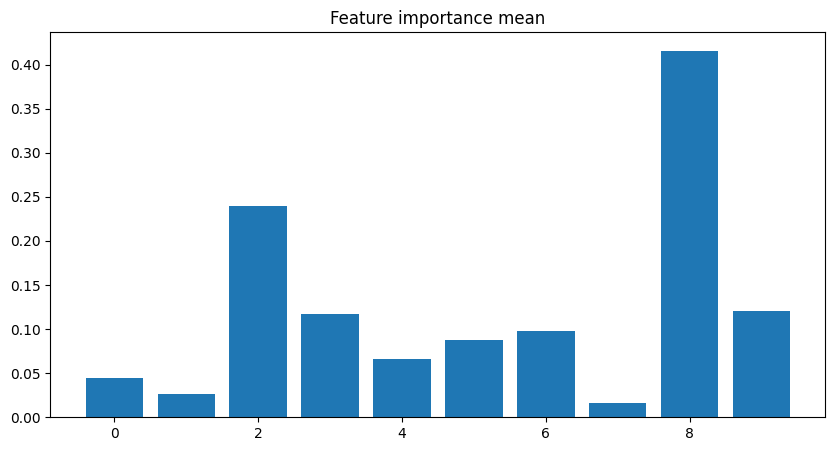

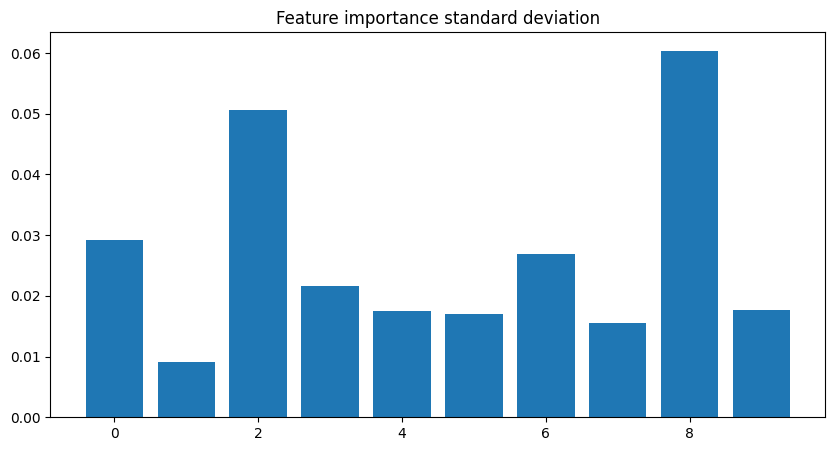

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Regressor
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train,y_train)

# Compute the feature importance and plot the results
feat_importance = permutation_importance(rf,X,y,scoring='r2')
feat_importance_mean, feat_importance_std = feat_importance['importances_mean'], feat_importance['importances_std']
plt.figure(figsize=(10,5))

plt.bar(x=np.arange(len(feat_importance_mean)),height=feat_importance_mean)
plt.title("Feature importance mean")
plt.figure(figsize=(10,5))
plt.bar(x=np.arange(len(feat_importance_std)),height=feat_importance_std)
plt.title("Feature importance standard deviation")


# Regression
## Exercise 6

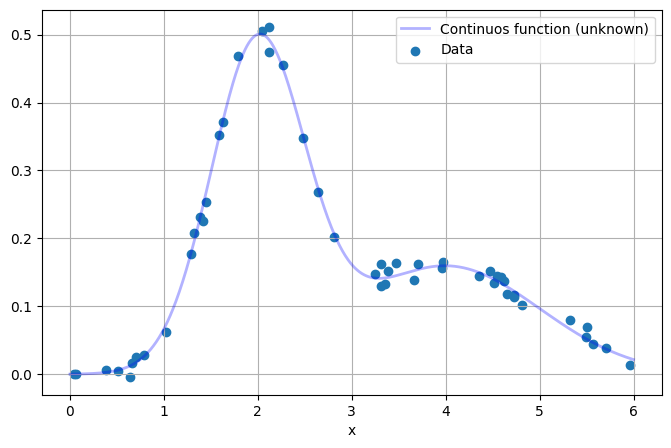

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

In [55]:
Xr = Xr.reshape(-1,1)
yr = yr.reshape(-1,1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


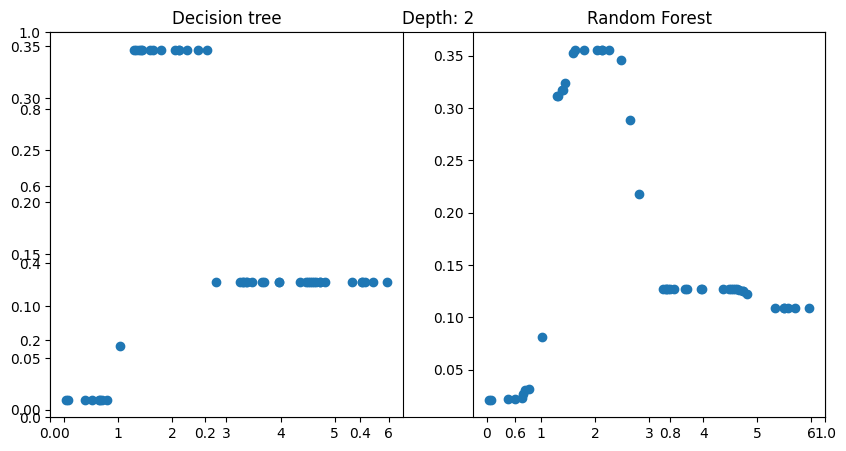

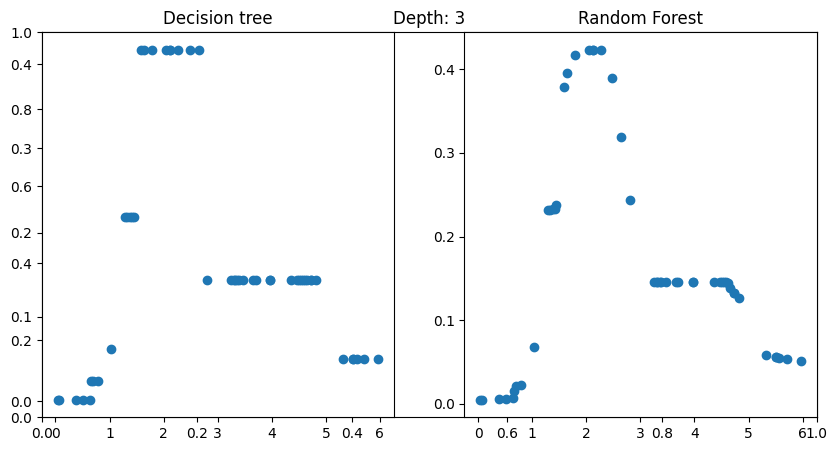

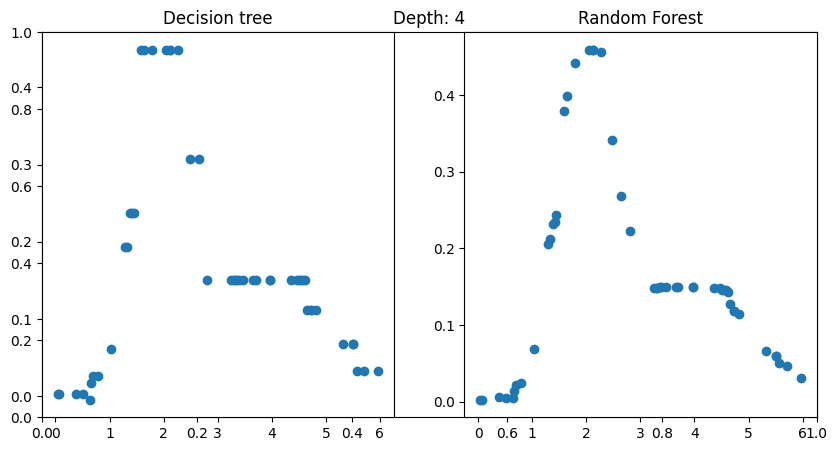

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

depths = [2,3,4]

for depth in depths:
    plt.figure(figsize=(10,5))
    plt.title("Depth: "+str(depth))
    plt.subplot(1,2,1)
    plt.title("Decision tree")
    tree = DecisionTreeRegressor(criterion='squared_error',max_depth=depth,random_state=0)
    tree.fit(Xr,yr)
    pred1 = tree.predict(Xr)
    plt.scatter(Xr,pred1)
    plt.subplot(1,2,2)
    plt.title("Random Forest")
    rf = RandomForestRegressor(criterion='squared_error',max_depth=depth,random_state=0)
    rf.fit(Xr,yr)
    pred2 = rf.predict(Xr)
    plt.scatter(Xr,pred2)

Random forest prediction follows more closely the shape of the continuous fonction, Decision tree seems more difficult to adapt to real-valued function as the one studied, it is a succession of constant approximation.

The deeper is the tree/random forest, the closer is the shape of the prediction to the target function especially in the case of random forest.

# AdaBoost + stump (bonus question)
## Exercise 7 ((a),(b),(c)) (+13)

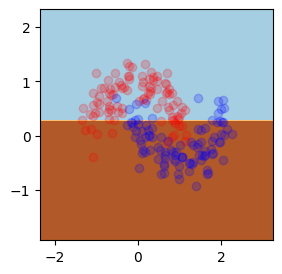

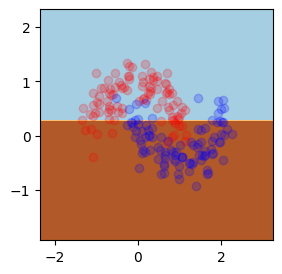

In [94]:
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_bellow_threshold = None
    self.class_above_threshold = None
    self.best_ev = None
  def get_threshold(self): 
      return self.best_threshold
  def get_best(self): 
      return self.best_dimension,  self.best_threshold, self.best_ev
  
  def gini(self,w_left,w_right,sample_weight):
    if np.sum(w_left) != 0:
      gini_left = 1-(np.sum(w_left**2)/(np.sum(w_left)**2))
    else:
      gini_left = 0
    if np.sum(w_right) != 0:
      gini_right = 1-(np.sum(w_right**2)/(np.sum(w_right)**2))
    else:
      gini_right = 0
    return ((np.sum(w_left)*gini_left) + (np.sum(w_right)*gini_right))/(np.sum(sample_weight))

  def fit(self,X,y, sample_weight=None): 
    if sample_weight is None: sample_weight = np.ones(len(X))
    best_ev = np.inf
    region = [X.min(axis=0), X.max(axis=0)]
    class_above=-1
    seuil = 0
    dim_best = 0
    for dimension in [0,1]:
      w_right = np.zeros(2)
      w_left = np.zeros(2)
      
      for i in range(len(y)):
        w_right[int((y[i]+1)//2)] += sample_weight[i]
      X_dim = np.sort(X[:,dimension])
      y_sorted = y[np.argsort(X[:,dimension])]
      sample_weight_sorted = sample_weight[np.argsort(X[:,dimension])]

      for i in range(len(y)):
        w_left[int((y_sorted[i]+1)//2)] += sample_weight_sorted[i]
        w_right[int((y_sorted[i]+1)//2)] -= sample_weight_sorted[i]
      
        ev_cand = self.gini(w_left,w_right,sample_weight)
        if ev_cand < best_ev:
          best_ev = ev_cand
          seuil = X_dim[i]
          class_above = np.argmax(w_right)*2-1
          dim_best=dimension

    self.best_threshold = seuil
    self.best_dimension=dim_best
    self.class_above_threshold=class_above
    self.class_bellow_threshold=-class_above
        

  def predict(self,X) :
    res = []
    for x in X[:,self.best_dimension]:
      if x < self.best_threshold :
        res.append(self.class_bellow_threshold)
      else:
        res.append(self.class_above_threshold)
    return np.array(res)


  
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1 # For AdaBoost y={-1,+1} but the rest can be y={0,1} 

my_stump = My_stump()
my_stump.fit(X, y)
plot_tree(my_stump,X,y)

# Sanity check: my_stump should be the same as the decisionTree of depth=1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y)
plot_tree(clf,X,y)

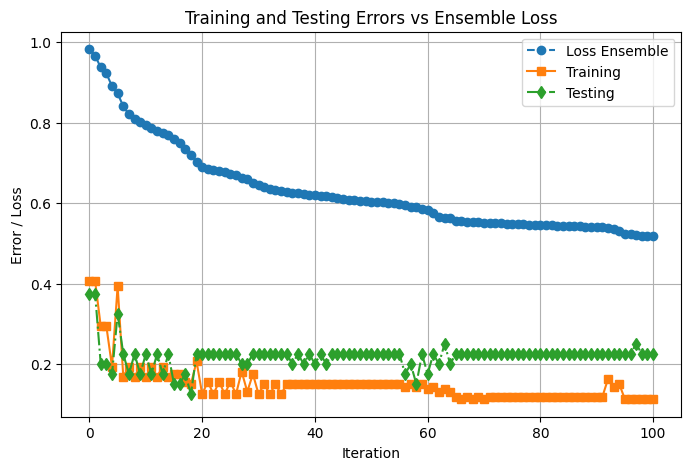

In [95]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
def compute_error(y, y_pred, w_m):
    return np.sum(w_m*(y != y_pred))/np.sum(w_m)


def compute_alpha(error):
    return np.log((1-error)/error)/2

def update_weights(w_i, alpha, y, y_pred, error):
    return w_i*np.exp(-alpha*y*y_pred)/(2*np.sqrt(error*(1-error)))
  
class AdaBoost:
    
    def __init__(self):
        self.alphas = [] # list of coefficients for the classifiers
        self.G_M = [] # list of wesk clssifier
        self.M = None # number of iterations
        # we save the error for plotting the evoltion of the performance
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []
    
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(self.M):
            if i == 0:
                y_pred = self.alphas[i] * self.G_M[i].predict(X)
            else:
                y_pred += self.alphas[i] * self.G_M[i].predict(X)
        return np.sign(y_pred)

    def fit(self, X, y, M = 1, X_test=None, y_test=None):
        self.alphas = [] 
        self.training_errors, self.testing_errors = [],[]
        self.M = 0
        Z=1

        # Iterate over M weak classifiers
        for m in range(0, M):
            # Set weights for current boosting iteration
            if m == 0:
                w_m = np.ones(len(y)) * 1 / len(y)
            else:
                w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)

            # Now, we can use our stumps...
            G_m = DecisionTreeClassifier(max_depth = 1) # Stump from sklearn
            G_m.fit(X, y, sample_weight = w_m)
            y_pred = G_m.predict(X)
            #... or the ones from sklearn
            G_m_my = My_stump() # Stump coded in the previous (bonus) question
            G_m_my.fit(X, y, sample_weight = w_m)
            my_pred = G_m_my.predict(X) 
            self.G_M.append(G_m)
            self.M += 1
            error_m = compute_error(y,y_pred,w_m)
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)
            y_pred_train = self.predict(X)
            y_pred_test = self.predict(X_test)
            self.training_errors.append(compute_error(y,y_pred_train,np.ones(len(y))))
            self.testing_errors.append(compute_error(y_test,y_pred_test,np.ones(len(y_test))))
            Z *= 2*np.sqrt((error_m*(1-error_m)))
            self.loss_ensemble.append(Z)
            
        
        

dataset = datasets[2]
X = dataset[0]
y = dataset[1]*2-1 # For the AdaBoost y={-1,+1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ab = AdaBoost()
ab.fit(X_train, y_train, M = 101, X_test=X_test, y_test=y_test)
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.title("Training and Testing Errors vs Ensemble Loss")
plt.legend()
plt.grid(True)
plt.show()

Dataset # 1


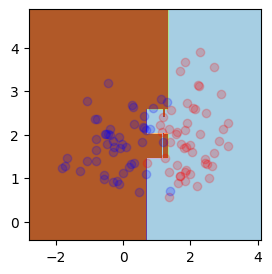

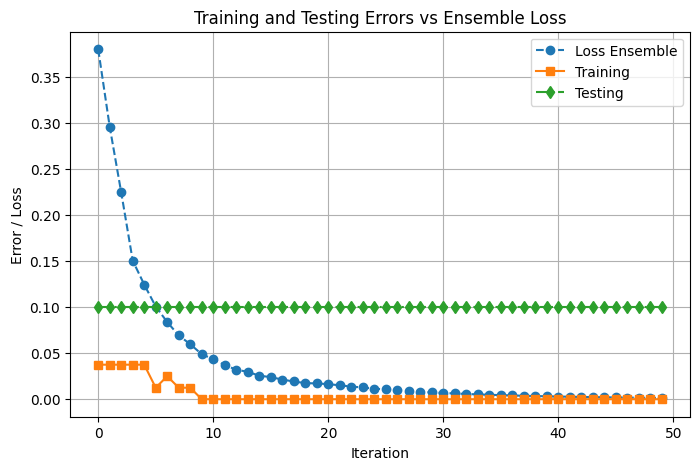

Dataset # 2


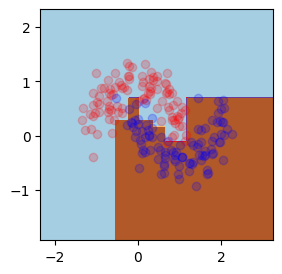

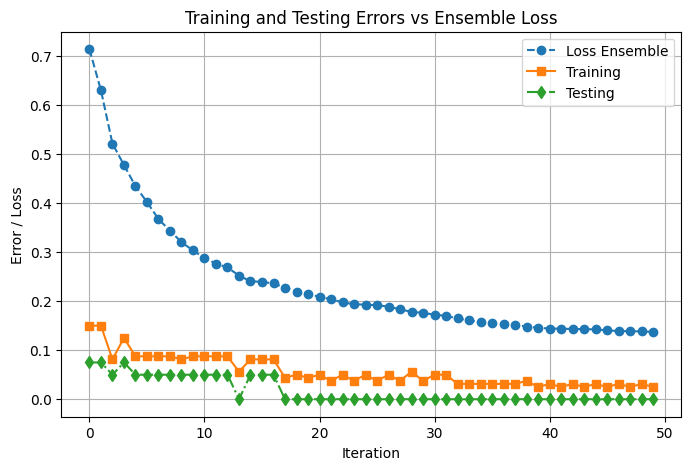

Dataset # 3


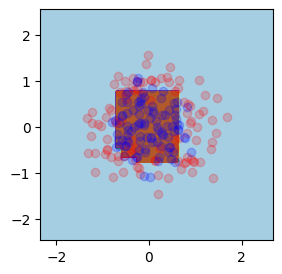

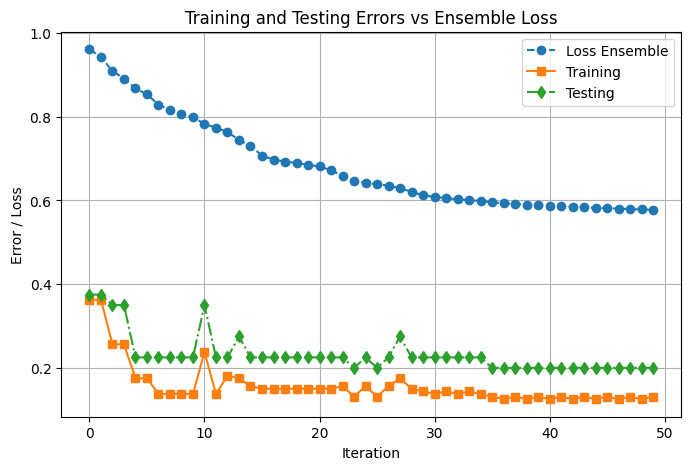

Dataset # 4


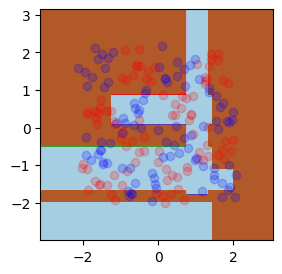

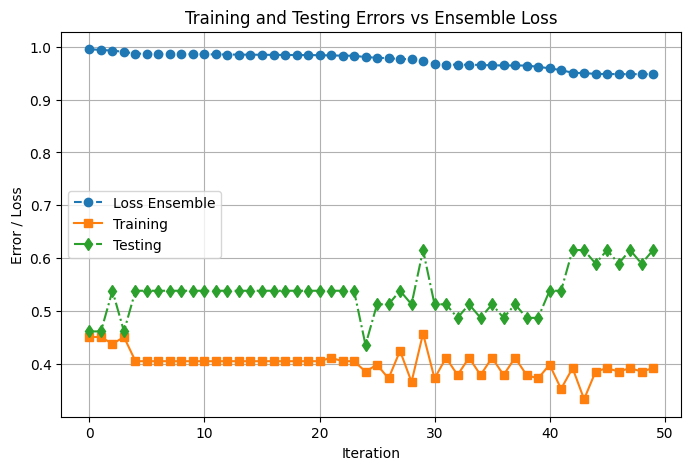

In [96]:
for i in range(len(datasets)):
    print("Dataset #", i+1)
    dataset = datasets[i]
    X = dataset[0]
    y = dataset[1]*2-1 # For the AdaBoost y={-1,+1}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    ab = AdaBoost()
    ab.fit(X_train, y_train, M = 50, X_test=X_test, y_test=y_test)
    plot_tree(ab,X,y)
    plt.figure(figsize=(8, 5))
    plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
    plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
    plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
    plt.xlabel("Iteration")
    plt.ylabel("Error / Loss")
    plt.title("Training and Testing Errors vs Ensemble Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# AUC ROC - AUC PR

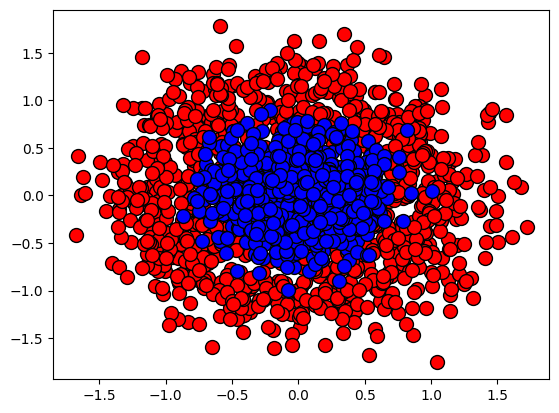

In [97]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

### Exercise 8

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_true, proba)
    roc_auc = auc(fpr, tpr)
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ =  precision_recall_curve(y_true, proba)
    pr_auc = average_precision_score(y_true, proba)
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled
    


### Exercise 9

Class membership probabilities for the first few test samples:
[[0.33 0.67]
 [0.46 0.54]
 [0.32 0.68]
 [0.76 0.24]
 [0.78 0.22]]


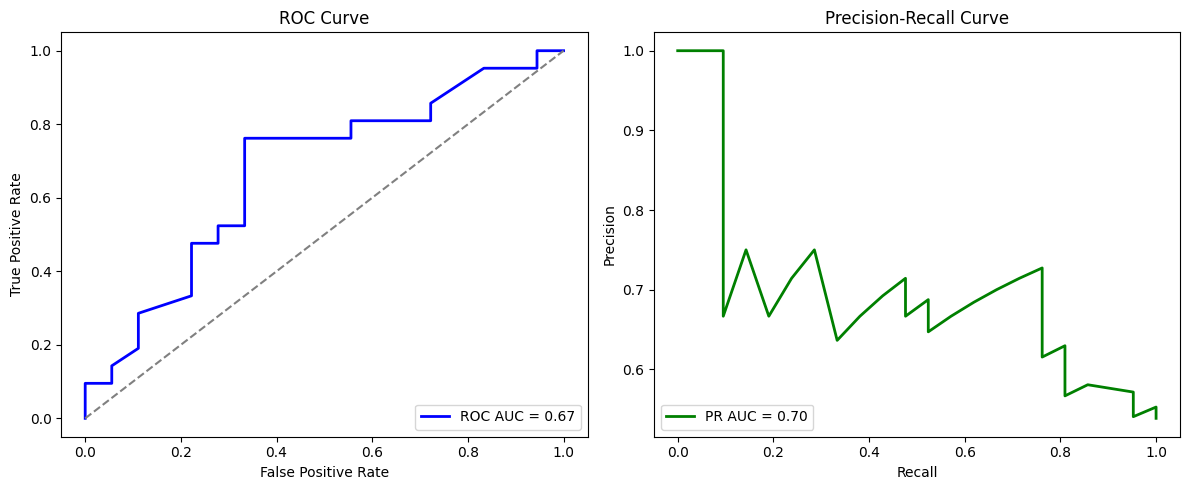

In [102]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)

print("Class membership probabilities for the first few test samples:")
print(proba[:5])
plot_roc_pr(proba[:,1], y_test)

### Exercise 10

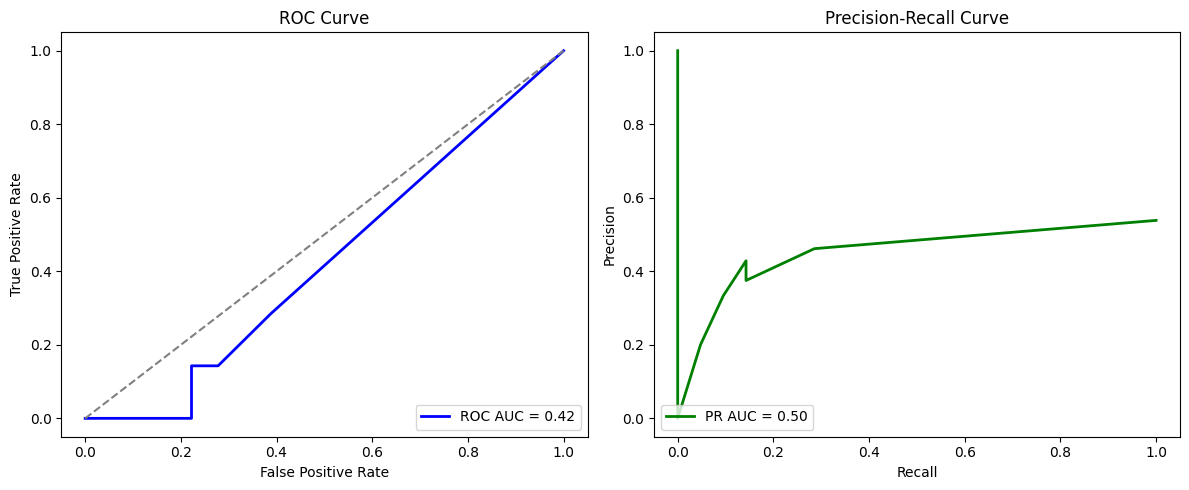

In [100]:
X_subsampled, y_subsampled = subsample_data(X, y, keep_ratio=0.4)

rf_subsampled = RandomForestClassifier(random_state=0)
rf_subsampled.fit(X_subsampled, y_subsampled)

proba_subsampled = rf_subsampled.predict_proba(X_test)[:, 1]

plot_roc_pr(proba_subsampled, y_test)

### Exercise 11


1. **Precision**:  
    Precision is the conditional probability of a positive prediction being correct, given that the prediction is positive.  
    $$
    \text{Precision} = P(Y = 1 \mid \hat{Y} = 1)
    $$

2. **Recall (True Positive Rate)**:  
    Recall is the conditional probability of correctly predicting a positive class, given that the true class is positive.  
    $$
    \text{Recall} = P(\hat{Y} = 1 \mid Y = 1)
    $$

3. **False Positive Rate (FPR)**:  
    FPR is the conditional probability of incorrectly predicting a positive class, given that the true class is negative.  
    $$
    \text{FPR} = P(\hat{Y} = 1 \mid Y = 0)
    $$

4. **True Positive Rate (TPR)**:  
    TPR is equivalent to recall and represents the conditional probability of correctly predicting a positive class, given that the true class is positive.  
    $$
    \text{TPR} = P(\hat{Y} = 1 \mid Y = 1)
    $$


### Exercise 12


The F1-score is the harmonic mean of **Precision** and **Recall**. It is then defined as:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$
